# Normal Task: Analyze customer behavior based on transaction data

**Develop a data analysis project that focuses on understanding and analyzing
customer behavior based on transactional data. The goal is to perform Exploratory
Data Analysis (EDA) to derive valuable insights into customer preferences,
purchasing patterns, and overall behavior.**

**Objective**
To leverage a transactional dataset and perform a comprehensive Exploratory Data Analysis (EDA) to gain deep insights into customer behaviour. This analysis will focus on uncovering customer preferences, identifying purchasing patterns, and understanding overall customer trends. These insights will be used to generate actionable recommendations for Supermarkets to improve business, ultimately enhancing profits and better customer retention.

**Scope**
The scope of the analysis is to gain insights from Nielsen store transaction data. The dataset includes information about monthly sales, store codes, bill IDs, bill amounts, quantities, values, prices, and categorical attributes such as group, subgroup, company name, mother brand, and brand. The analysis aims to understand sales trends, customer preferences, store performance, and the relationship between different variables.


1. Data Collection and Initial Exploration
2. Data Cleaning
3. Data Transformation
4. Univariate Analysis
5. Bivariate Analysis
6. Multivariate Analysis
7. Customer Segmentation
8. Time Series Analysis
9. Visualization
10. Insight Generation & Reporting

# Import Necessary Libraries

In [2]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Date and time manipulation
from datetime import datetime

# Machine learning for clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Visualization for PCA
from mpl_toolkits.mplot3d import Axes3D

# Interactive visualization (optional)
import plotly.express as px
import plotly.graph_objects as go

# Statistics
from scipy import stats

from sklearn.preprocessing import LabelEncoder
import warnings

%matplotlib inline

**Explanation of Imports:**
* `pandas` and `numpy`: Essential for data manipulation and numerical operations.
* `matplotlib.pyplot` and `seaborn`: Key libraries for creating a wide range of static visualizations.
* `datetime`: Useful for manipulating date and time data.
* `sklearn.cluster.KMeans` and `sklearn.decomposition.PCA`: Necessary for performing clustering and principal component analysis.
* `mpl_toolkits.mplot3d.Axes3D`: Enables 3D plotting for multivariate analysis.
* `plotly.express` and `plotly.graph_objects`: Provides tools for creating interactive visualizations and dashboards.
* `scipy.stats`: Contains statistical functions that may be useful for data analysis.

In [3]:
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
warnings.filterwarnings("ignore", message="When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group.*")
warnings.simplefilter(action='ignore', category=FutureWarning)


# 1. Data Collection and Initial Exploration

**Task Description:**

In this step, we will load the transactional dataset into our analysis environment using a data manipulation library like pandas. We'll display the first few rows to get an overview of the dataset and its structure. By summarizing the dataset with basic statistics, we will gain an initial understanding of key metrics.

In [ ]:
data = pd.read_csv('/kaggle/input/store-transaction-data/Hackathon_Ideal_Data.csv')
data.head()

In [ ]:
data1 = pd.read_csv('/kaggle/input/store-transaction-data/Hackathon_Mapping_File.csv')
data1

In [ ]:
data2 = pd.read_csv('/kaggle/input/store-transaction-data/Hackathon_Validation_Data.csv')
data2.head()

In [ ]:
data3 = pd.read_csv('/kaggle/input/store-transaction-data/Hackathon_Working_Data.csv')
data3.head()

In [ ]:
data.shape, data1.shape, data2.shape, data3.shape

In [ ]:
data.columns, data1.columns, data2.columns, data3.columns

# Understanding the Dataset

* **MONTH**     : Month when the transaction occurred   
* **STORECODE** : A unique identifier for each store
* **DAY**       : Day when the transaction occurred  
* **BILL_ID**   : A unique identifier for each transaction or bill
* **BILL_AMT**  : Represents total amount of the purchase
* **QTY**       : Represents number of units of a product  
* **VALUE**     : The total value of the item(s) purchased, calculated as quantity multiplied by price 
* **PRICE**     : Price of a single unit  
* **GRP**       : Group or Category of the products  
* **SGRP**      : Subgroup or subcategory of product groups   
* **SSGRP**     : Subgroup of Subgroup of product groups 
* **CMP**       : Represents Company name
* **MBRD**      : Represents Mother Brand 
* **BRD**       : Represents Brand name

# EDA on Hackton Working Data

In [38]:
df = pd.read_csv('/kaggle/input/store-transaction-data/Hackathon_Working_Data.csv')

# Display the first few rows
print("Initial Data:")
df.head()

Initial Data:


,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT


In [39]:
# Summary statistics
print("\nSummary Statistics:")
df.describe(include='all')


Summary Statistics:


,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
count,26985,26985,26985.000000,26985,26985.000000,26985.000000,26985.000000,26985.000000,26985,26985,26985,26985,26985,26985
unique,3,10,NaN,6424,NaN,NaN,NaN,NaN,80,174,232,354,643,1315
top,M3,N7,NaN,T1521,NaN,NaN,NaN,NaN,BISCUITS - CORE & NON CORE,SWEET/COOKIES,SWEET/COOKIES,BRITANNIA INDS,MARIE GOLD,MARIE GOLD REGULAR
freq,9430,5625,NaN,44,NaN,NaN,NaN,NaN,6677,1954,1954,3147,977,786
mean,NaN,NaN,15.167019,NaN,278.754206,4.105021,67.808551,52.812982,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,8.956057,NaN,541.398504,95.666947,118.005978,84.987730,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,0.000000,0.500000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,7.000000,NaN,40.000000,1.000000,10.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,14.000000,NaN,111.000000,1.000000,30.000000,22.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,23.000000,NaN,280.000000,2.000000,80.000000,64.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df['UNIQUE_BILL_ID'] = df['STORECODE'] + df['BILL_ID']

In [41]:
sales_revenue=df.groupby('UNIQUE_BILL_ID')['VALUE'].sum().reset_index()
sales_revenue.head()

,UNIQUE_BILL_ID,VALUE
0,N10T1038,34.0
1,N10T1039,46.0
2,N10T1040,86.0
3,N10T1043,20.0
4,N10T1048,180.0


In [43]:
specific_value = 'N10T1048'
filtered_data = df[df['UNIQUE_BILL_ID'] == specific_value]
filtered_data

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD,UNIQUE_BILL_ID
10672,M1,N10,5,T1048,180.0,1.0,147.0,147.0,SPICES (03/04),PURE,ASOFOETIDA/HING-PURE MASALA,LALJI GODU,L G,L G,N10T1048
10673,M1,N10,5,T1048,180.0,1.0,33.0,33.0,SPICES (03/04),BLENDED,CHAT MASALA-SNACK MASALA,K C J & CO,EVEREST,EVEREST,N10T1048


# 2. Data Cleaning

**Task Description:**

Data cleaning involves identifying and handling missing values and duplicate records in the dataset. We will ensure that each column has the correct data type, such as converting MONTH and DAY to datetime objects and QTY and VALUE to numeric types. Additionally, we'll address any inconsistencies in column names and formats to maintain data integrity and prepare the dataset for analysis.


### Duplicate Values

In [44]:
# Check for duplicates
duplicates = df.duplicated()
print("\nDuplicate Rows:")
df[duplicates]


Duplicate Rows:


,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD,UNIQUE_BILL_ID
516,M1,N1,8,T840,105.0,1.0,15.0,15.0,BREAKFAST CEREALS,HOT CEREALS,OATS,PEPSICO INDIA,QUAKER,QUAKER OATS,N1T840
670,M1,N1,9,T987,105.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,NON-SALT CRACKER,NON-SALT CRACKER,PARLE PRODS,PARLE KRACK JACK,PARLE KRACK JACK,N1T987
1119,M1,N1,12,T1376,130.0,1.0,5.0,5.0,CONFECTIONERY - TOFFEE/HBC,TOFFEES,TOFFEES,PERFETTI VAN MELLE,CHUPA CHUPS,CHUPA CHUPS SOUR BELT,N1T1376
2032,M1,N1,26,T3026,40.0,1.0,10.0,10.0,VERMICELLI & NOODLE,INSTANT NOODLES,INSTANT NOODLES,CAPITAL FOODS,CHING'S SECRET,CHING'S SECRET,N1T3026
2298,M1,N1,29,T3372,350.0,1.0,160.0,160.0,CHOCOLATE,MOULDED,MOULDED,MONDELEZ INTERNATIONAL,CADBURY DAIRY MILK,DAIRY MILK SILK,N1T3372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26516,M3,N10,2,T4962,50.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,SALT CRACKER,SALT CRACKER,PARLE PRODS,MONACO,MONACO,N10T4962
26615,M3,N10,4,T5163,915.0,2.0,280.0,140.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GIRNAR FOOD & BEVER,GIRNAR,GIRNAR,N10T5163
26616,M3,N10,4,T5163,915.0,2.0,280.0,140.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GIRNAR FOOD & BEVER,GIRNAR,GIRNAR,N10T5163
26718,M3,N10,11,T5389,65.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,SALT CRACKER,SALT CRACKER,PARLE PRODS,MONACO,MONACO,N10T5389


In [45]:
df.duplicated().sum()

90

In [46]:
# Remove Duplicate Records
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

### Missing Values

In [47]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
MONTH             0
STORECODE         0
DAY               0
BILL_ID           0
BILL_AMT          0
QTY               0
VALUE             0
PRICE             0
GRP               0
SGRP              0
SSGRP             0
CMP               0
MBRD              0
BRD               0
UNIQUE_BILL_ID    0
dtype: int64


In [10]:
# Check if there are any missing values
missing_data=df.isna().any().any()
missing_data

False

**There are no Missing values in the Dataset**

# 3. Data Transformation

In this step, we will perform necessary data transformations to enhance the dataset. This includes converting date-related columns into datetime objects and extracting features such as the day of the week. We will also encode categorical variables (e.g., GRP, SGRP, SSGRP) into numerical values. Additionally, we will create new features like the average bill amount per store and total sales per month to provide more insights during analysis.

In [48]:
df.dtypes

MONTH              object
STORECODE          object
DAY                 int64
BILL_ID            object
BILL_AMT          float64
QTY               float64
VALUE             float64
PRICE             float64
GRP                object
SGRP               object
SSGRP              object
CMP                object
MBRD               object
BRD                object
UNIQUE_BILL_ID     object
dtype: object

### Encoding data into the numrical values

#### Enocde MONTH to numberical data

In [49]:
def remove_character(column):
    return column.str.replace('M', '')

df['MONTH'] = remove_character(df['MONTH'])
df['MONTH'] = df['MONTH'].astype(int)

#### Encode STORECODE using LabelEncoder

In [50]:
label_encoder = LabelEncoder()
df['STORECODE'] = label_encoder.fit_transform(df['STORECODE']) + 1

#### Numerical Features

In [51]:
numerical_variables = [feature for feature in df.columns if df[feature].dtypes!='O']
print('Number of numerical variables:', len(numerical_variables))

df[numerical_variables].sample(1)

Number of numerical variables: 7


,MONTH,STORECODE,DAY,BILL_AMT,QTY,VALUE,PRICE
12918,2,8,3,25.0,2.0,20.0,10.0


In [52]:
days=df['DAY'].unique()
print('days ',sorted(days))

days  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


In [53]:
unique_storecodes = df['STORECODE'].unique()
sorted_unique_storecodes = sorted(unique_storecodes)
print('storecodes ',sorted_unique_storecodes)

storecodes  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


#### Categorical Features

In [54]:
categorial_variables = [feature for feature in df.columns if df[feature].dtypes=='O']
print('Number of categorial variables:', len(categorial_variables))

df[categorial_variables].sample(1)

Number of categorial variables: 8


,BILL_ID,GRP,SGRP,SSGRP,CMP,MBRD,BRD,UNIQUE_BILL_ID
22007,T3232,"FRAGRANCE-PERFUM,DEO & COLOGNE",FRAGRANCE - DEODORANT,FRAGRANCE - DEODORANT,ADJAVIS VENTURE LTD,LAYER'R,LAYER'R WOTTAGIRL,N5T3232


### Distribution of Numerical Features

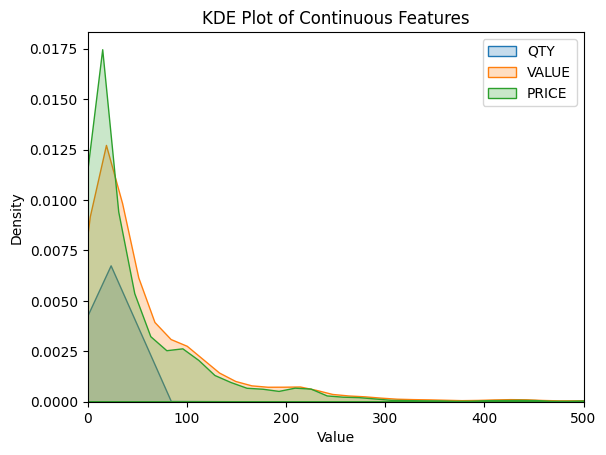

In [55]:
continuous_features = ['QTY', 'VALUE', 'PRICE']
for feature in continuous_features:
    sns.kdeplot(df[feature], shade=True, label=feature)
plt.title('KDE Plot of Continuous Features')
plt.xlabel('Value')
plt.ylabel('Density')
plt.xlim(0, 500)
plt.legend()
plt.show()

# 4. Univariate Analysis

Univariate analysis focuses on examining the distribution and summary statistics of individual variables. For numerical columns (QTY, VALUE, BILL_AMT, PRICE), we will compute central tendency and dispersion measures, and visualize their distributions using histograms and box plots. For categorical columns (GRP, SGRP, SSGRP), we will use count plots to understand their frequency distribution.

MONTH
Skew : -0.07


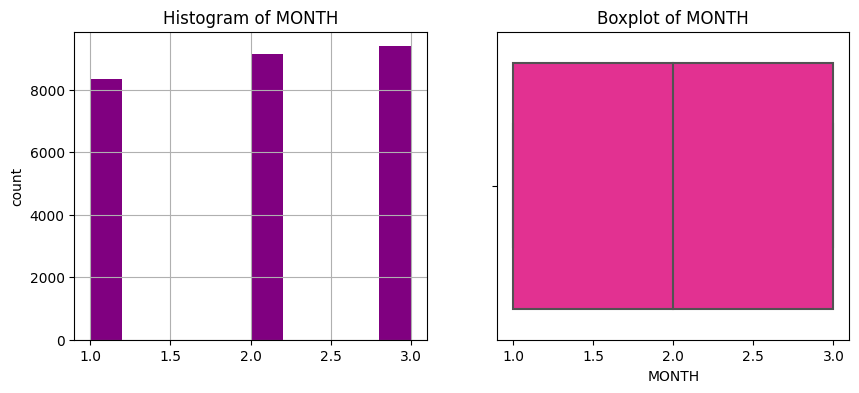

STORECODE
Skew : -0.15


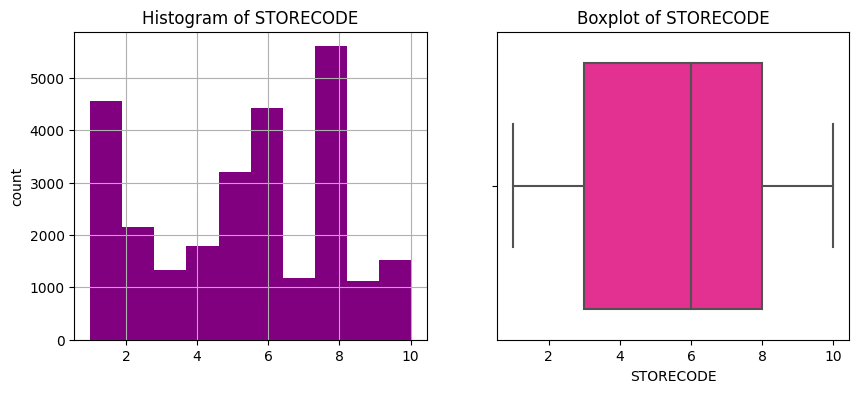

DAY
Skew : 0.16


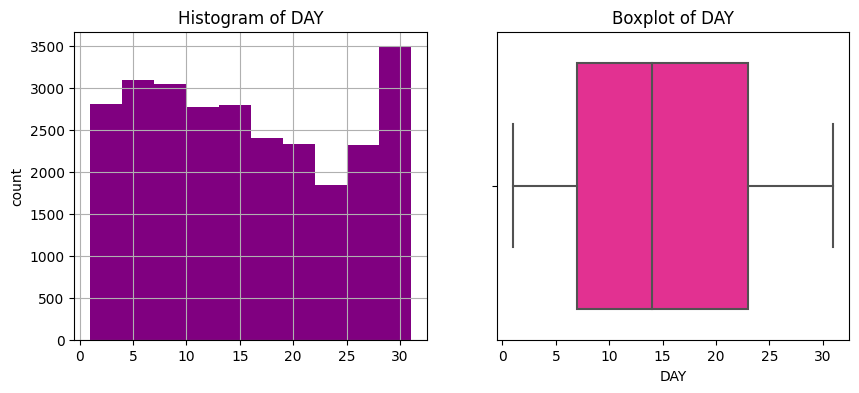

BILL_AMT
Skew : 5.94


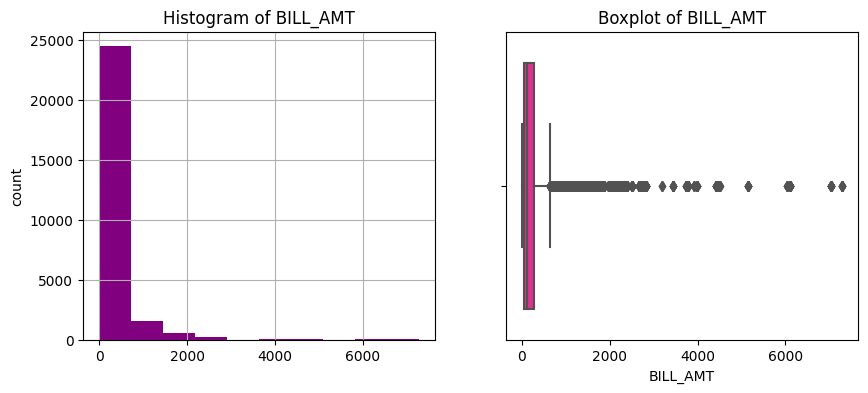

QTY
Skew : 84.94


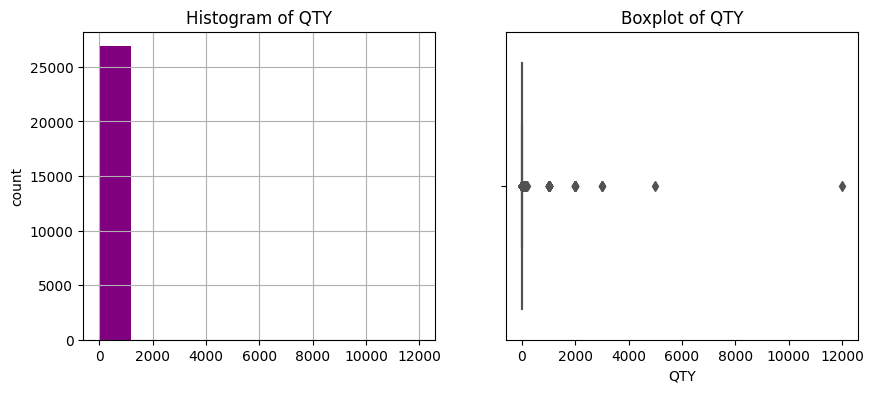

VALUE
Skew : 8.22


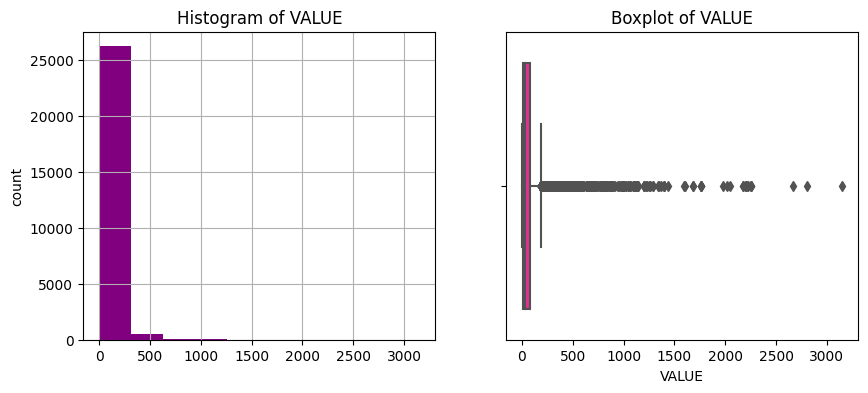

PRICE
Skew : 7.17


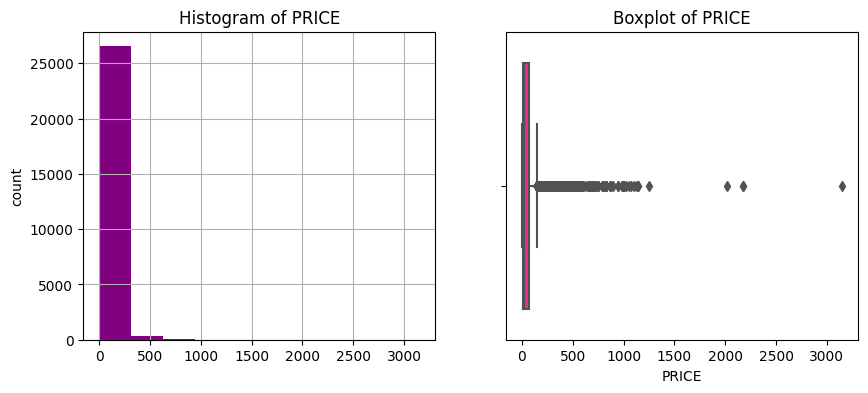

In [56]:
for col in numerical_variables:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (10, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=True,color='purple')
    plt.ylabel('count')
    plt.title('Histogram of ' + col)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col],color='deeppink')
    plt.title('Boxplot of ' + col)
    plt.show()

**Univariate Analysis on Categorical variables**

1. Most sold product GRP is Biscuts
2. Cream is most bought sub category of products
3. The most prefered products by the customers are from Hindustan Uniliver Limited
4. The most products are sold by TATA,DAIRY MILK and AMUL

In [57]:
df.columns

Index(['MONTH', 'STORECODE', 'DAY', 'BILL_ID', 'BILL_AMT', 'QTY', 'VALUE',
       'PRICE', 'GRP', 'SGRP', 'SSGRP', 'CMP', 'MBRD', 'BRD',
       'UNIQUE_BILL_ID'],
      dtype='object')

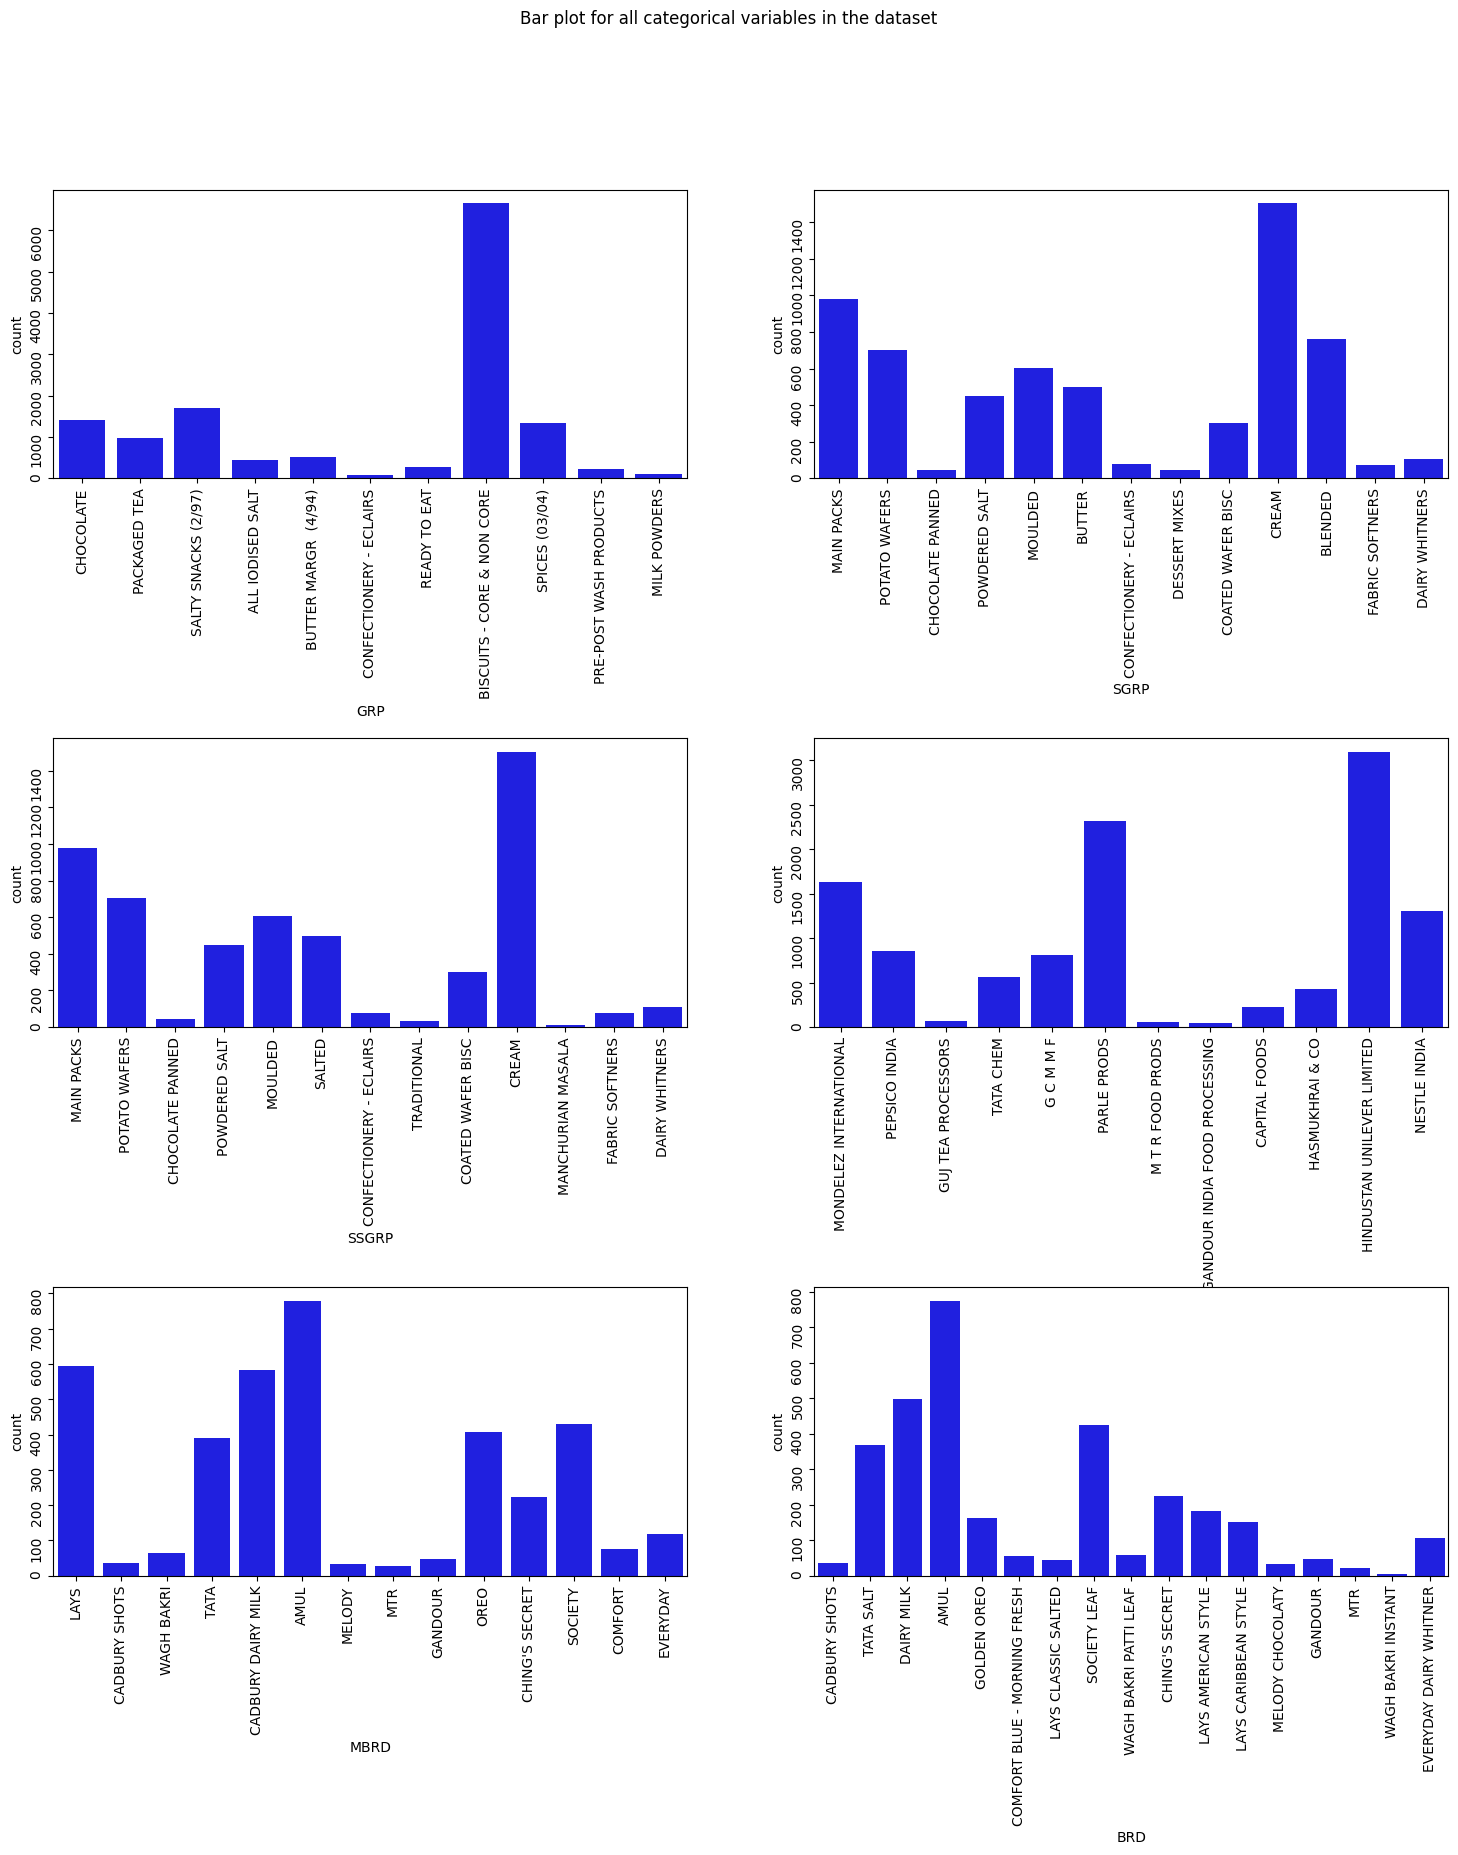

In [58]:
fig, axes = plt.subplots(3, 2, figsize = (18, 18),gridspec_kw={'hspace': 0.9})
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'GRP', data = df, color = 'blue', 
              order = df['GRP'].head(20).value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'SGRP', data = df, color = 'blue', 
              order = df['SGRP'].head(20).value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'SSGRP', data = df, color = 'blue', 
              order = df['SSGRP'].head(20).value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'CMP', data = df, color = 'blue', 
              order = df['CMP'].head(20).value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'MBRD', data = df, color = 'blue', 
              order = df['MBRD'].head(20).value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'BRD', data = df, color = 'blue', 
              order = df['BRD'].head(20).value_counts().index);
for ax in axes.flatten():
    ax.tick_params(labelrotation=90)
plt.show()


# 5. Bivariate Analysis

In bivariate analysis, we will explore relationships between pairs of variables. By computing correlation matrices and creating scatter plots, we can identify significant correlations among numerical columns (e.g., QTY, VALUE). We will also analyze the impact of categorical variables (e.g., GRP, SGRP) on numerical outcomes using box plots and bar charts, providing insights into how different categories affect sales and quantities.

## Correlation between Numerical Variables

In [85]:
numerical_features = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_features.corr()
print("Correlation Matrix:")
correlation_matrix

Correlation Matrix:


,MONTH,STORECODE,DAY,BILL_AMT,QTY,VALUE,PRICE
MONTH,1.000000,0.023602,0.017576,-0.024441,0.012408,-0.006075,0.004855
STORECODE,0.023602,1.000000,0.005647,0.156223,-0.022373,0.109938,0.110107
DAY,0.017576,0.005647,1.000000,-0.048778,0.008452,-0.027689,-0.021784
BILL_AMT,-0.024441,0.156223,-0.048778,1.000000,0.027493,0.460607,0.350183
QTY,0.012408,-0.022373,0.008452,0.027493,1.000000,0.067266,-0.018358
VALUE,-0.006075,0.109938,-0.027689,0.460607,0.067266,1.000000,0.791630
PRICE,0.004855,0.110107,-0.021784,0.350183,-0.018358,0.791630,1.000000


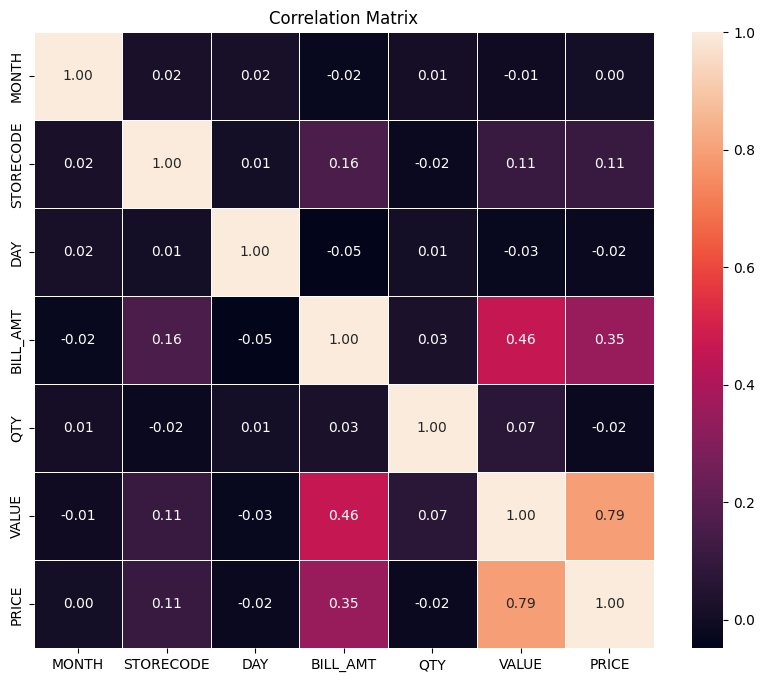

In [86]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Correlation between Categorical Variables

In [59]:
from scipy.stats import chi2_contingency
categorical_features = df.select_dtypes(include=['object'])
chi2_results = {}
for column1 in categorical_features:
    for column2 in categorical_features:
        if column1 != column2:
            contingency_table = pd.crosstab(df[column1], df[column2])
            chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
            chi2_results[(column1, column2)] = {'chi2_stat': chi2_stat, 'p_value': p_value}
for key, value in chi2_results.items():
    print(f"Chi-square test between {key}:")
    print(f"Chi-square statistic: {value['chi2_stat']}")
    print(f"P-value: {value['p_value']}")
    print()


Chi-square test between ('BILL_ID', 'GRP'):
Chi-square statistic: 537004.6647903138
P-value: 6.1860742392740824e-183

Chi-square test between ('BILL_ID', 'SGRP'):
Chi-square statistic: 1152621.1774729462
P-value: 2.5263408880724168e-166

Chi-square test between ('BILL_ID', 'SSGRP'):
Chi-square statistic: 1600964.0178185578
P-value: 0.0

Chi-square test between ('BILL_ID', 'CMP'):
Chi-square statistic: 2334266.5836628373
P-value: 4.0818880650867654e-213

Chi-square test between ('BILL_ID', 'MBRD'):
Chi-square statistic: 4123961.703418914
P-value: 0.4451131217442009

Chi-square test between ('BILL_ID', 'BRD'):
Chi-square statistic: 8148225.9570802245
P-value: 1.0

Chi-square test between ('BILL_ID', 'UNIQUE_BILL_ID'):
Chi-square statistic: 172746585.00000057
P-value: 0.0

Chi-square test between ('GRP', 'BILL_ID'):
Chi-square statistic: 537004.6647903138
P-value: 6.1860742392740824e-183

Chi-square test between ('GRP', 'SGRP'):
Chi-square statistic: 2023596.0122640324
P-value: 0.0

Chi-s

# 6. Multivariate Analysis

This task involves examining relationships between multiple variables simultaneously. We will use pair plots and heatmaps to uncover patterns and interactions that may not be visible in bivariate analysis. Additionally, we will perform Principal Component Analysis (PCA) to reduce the dimensionality of the dataset, highlighting the most important features that explain the variance in customer behavior.

# 7. Customer Segmentation

Customer segmentation involves grouping customers based on their purchasing behavior. We will apply clustering techniques such as K-means to segment customers using features like purchase frequency and average bill amount. Each customer segment will be analyzed and profiled to understand distinct behavior patterns, which can help in tailoring marketing strategies and improving customer targeting.

# 8. Time Series Analysis

Time series analysis focuses on analyzing data points collected or recorded at specific time intervals. We will plot sales data over time to identify trends and seasonal patterns. By aggregating data by month or quarter, we can observe periodic trends. Additionally, time series decomposition will be used to separate the data into trend, seasonal, and residual components, providing deeper insights into sales dynamics.

# 9. Visualization

In this step, we will create a variety of visualizations to effectively communicate key insights from our analysis. This includes line plots for temporal trends, bar charts for categorical comparisons, and heatmaps for correlation analysis. We will also develop interactive dashboards to facilitate dynamic exploration and presentation of the data.


### Overall Sales per Month

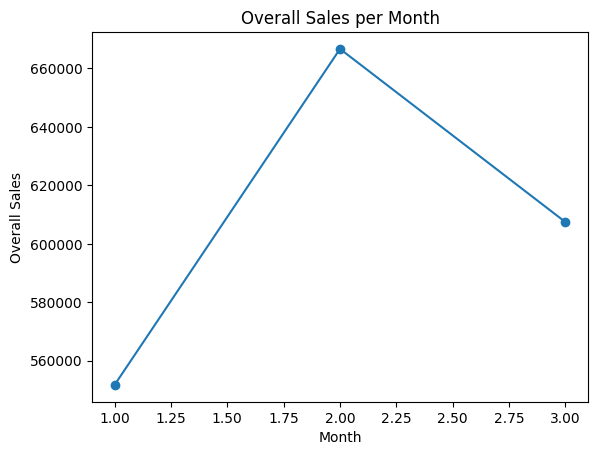

In [60]:
Overall_sales_per_month= df.groupby('MONTH')['VALUE'].sum()
Overall_sales_per_month.plot(kind='line', marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Overall Sales')
plt.title('Overall Sales per Month')
plt.show()

### Overall Sales per Store

In [61]:
sales_per_store = df.groupby('STORECODE')['VALUE'].sum().reset_index()
sales_per_store.sort_values(by='VALUE',ascending=False,inplace=True)
sales_per_store.head(3)

,STORECODE,VALUE
7,8,273296.65
9,10,250777.03
5,6,237242.00


### Average Sales per Store

In [62]:
Average_sales_per_store = df.groupby('STORECODE')['VALUE'].mean().reset_index()
Average_sales_per_store.sort_values(by='VALUE',ascending=False,inplace=True)
Average_sales_per_store.head(3)

,STORECODE,VALUE
2,3,166.748304
9,10,164.336193
8,9,103.302449


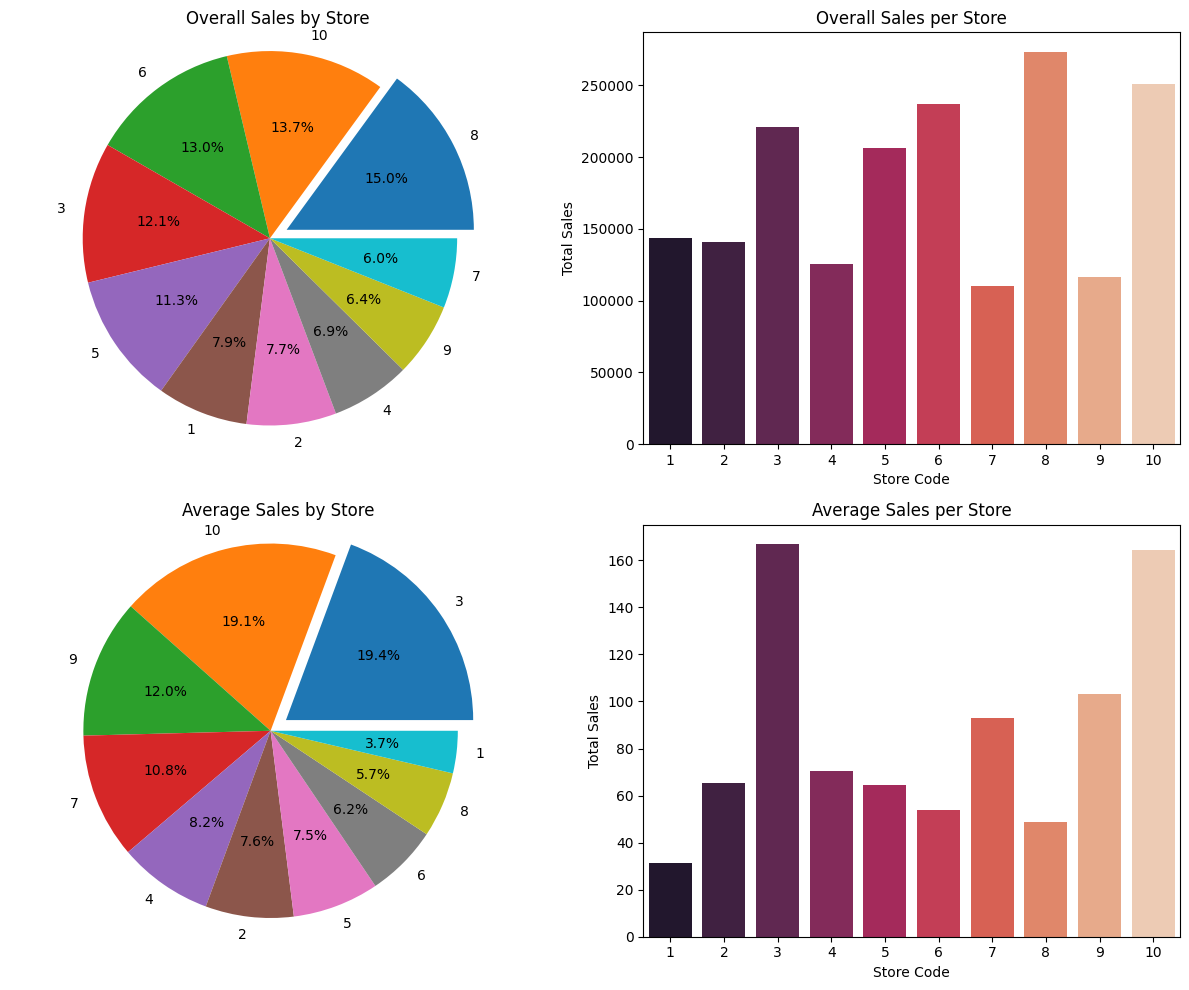

In [63]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
# Pie chart
explode = [0.1, 0,0,0,0,0,0,0,0,0]
axes[0, 0].pie(sales_per_store['VALUE'], labels=sales_per_store['STORECODE'],explode=explode, autopct='%1.1f%%')
axes[0, 0].set_title('Overall Sales by Store')
axes[0, 0].axis('equal')
# Bar plot
sns.barplot(x='STORECODE', y='VALUE', data=sales_per_store, palette="rocket", ax=axes[0, 1])
axes[0, 1].set_title('Overall Sales per Store')
axes[0, 1].set_xlabel('Store Code')
axes[0, 1].set_ylabel('Total Sales')
# Pie chart
axes[1, 0].pie(Average_sales_per_store['VALUE'], labels=Average_sales_per_store['STORECODE'],explode=explode, autopct='%1.1f%%')
axes[1, 0].set_title('Average Sales by Store')
axes[1, 0].axis('equal')
# Bar plot
sns.barplot(x='STORECODE', y='VALUE', data=Average_sales_per_store, palette="rocket", ax=axes[1, 1])
axes[1, 1].set_title('Average Sales per Store')
axes[1, 1].set_xlabel('Store Code')
axes[1, 1].set_ylabel('Total Sales')
plt.tight_layout()
plt.show()

### Daily Sales per Store with in a Month

In [64]:
sales_by_month_day = df.groupby(['MONTH', 'DAY'])['VALUE'].sum().reset_index()

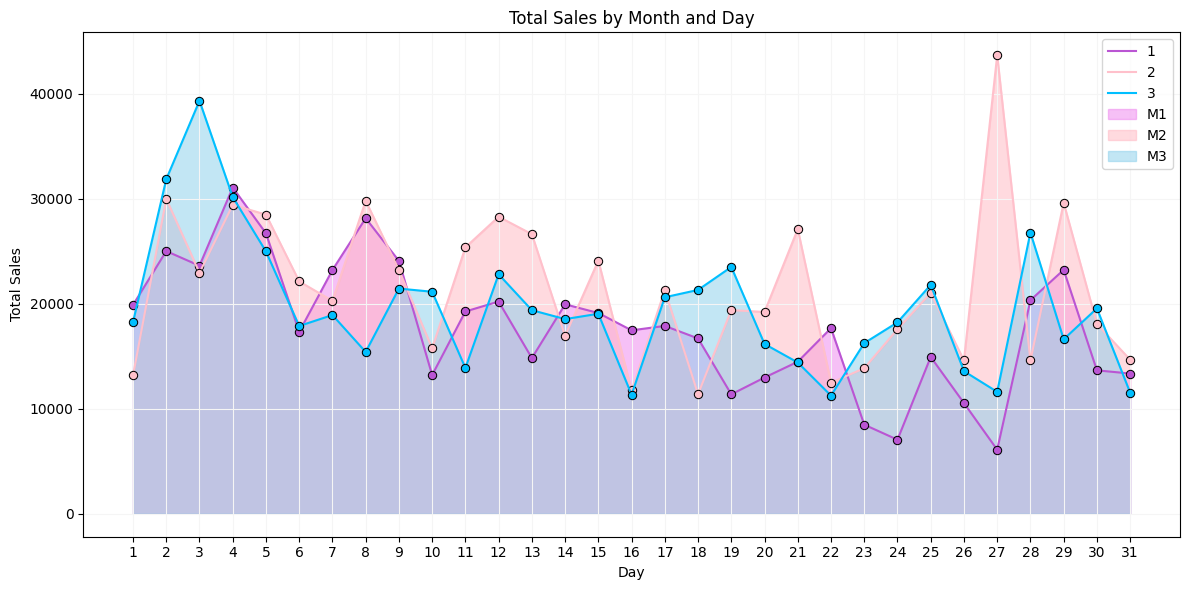

In [65]:
fig, ax = plt.subplots(figsize=(12, 6))
palettes=['mediumorchid','pink','deepskyblue']
sns.lineplot(data=sales_by_month_day, x='DAY', y='VALUE', hue='MONTH', marker='o',markeredgecolor='black',palette=palettes, ax=ax)
ax.set_xlabel('Day')
ax.set_ylabel('Sales')
ax.set_title('Sales by Day, Month-wise')
ax.legend(title='Month')
ax.set_xticks(range(1, max(df['DAY']) + 1)) 

sales_by_month_day_m1 = sales_by_month_day[sales_by_month_day['MONTH'] == 1]
sales_by_month_day_m2 = sales_by_month_day[sales_by_month_day['MONTH'] == 2]
sales_by_month_day_m3 = sales_by_month_day[sales_by_month_day['MONTH'] == 3]

ax.fill_between(sales_by_month_day_m1['DAY'], sales_by_month_day_m1['VALUE'], alpha=0.5, label='M1',color="violet")
ax.fill_between(sales_by_month_day_m2['DAY'], sales_by_month_day_m2['VALUE'], alpha=0.5, label='M2',color="lightpink")
ax.fill_between(sales_by_month_day_m3['DAY'], sales_by_month_day_m3['VALUE'], alpha=0.5, label='M3',color="skyblue")
ax.set_xlabel('Day')
ax.set_ylabel('Total Sales')
ax.set_title('Total Sales by Month and Day')
ax.legend()
ax.grid(True,color='whitesmoke')
plt.tight_layout()
plt.show()

### Total Number of Products per Store over 3 Months

In [66]:
total_products_per_store= df.groupby('STORECODE')['QTY'].sum().sort_values(ascending=False).reset_index()

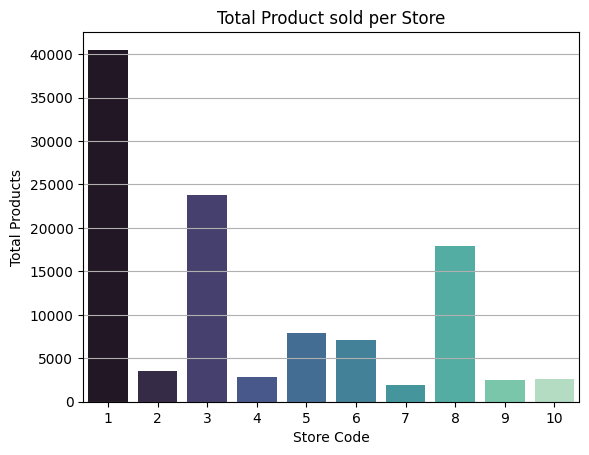

In [67]:
sns.barplot( x='STORECODE', y='QTY',data=total_products_per_store, palette = "mako")
plt.title('Total Product sold per Store')
plt.xlabel('Store Code')
plt.ylabel('Total Products')
plt.grid(axis='y')
plt.show()

### Sales Vs Number of Products Sold on each Store

In [68]:
merged_data = pd.merge(total_products_per_store, sales_per_store, on='STORECODE')
merged_data.set_index('STORECODE', inplace=True)
merged_data.reset_index(inplace=True)

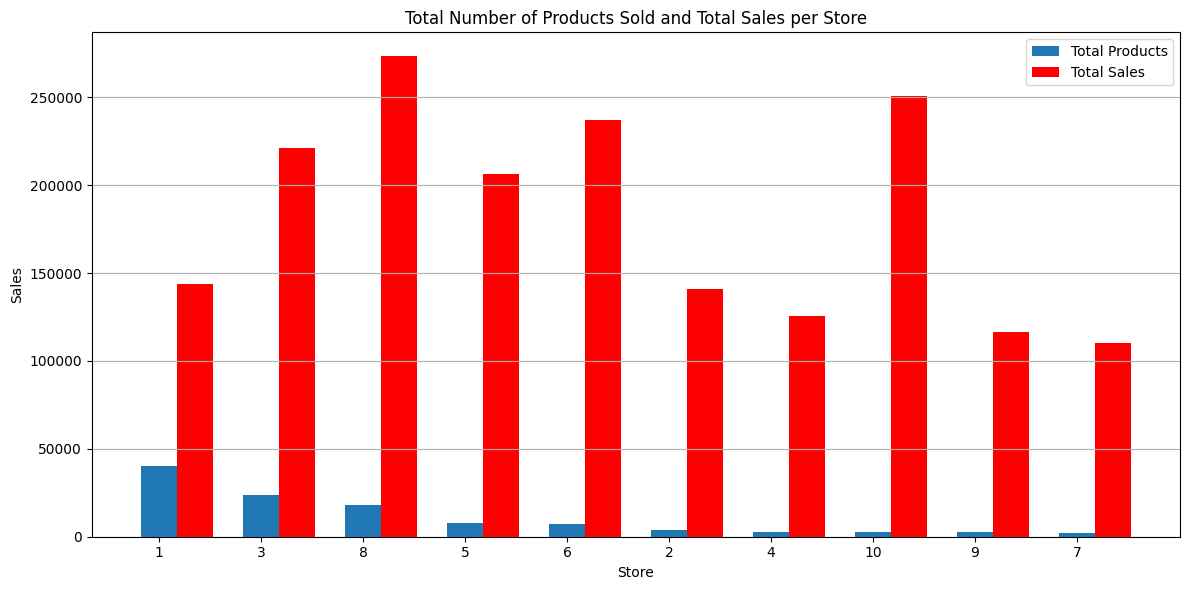

In [69]:
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = range(len(merged_data))
bar1 = plt.bar(x, merged_data['QTY'], bar_width, label='Total Products')
bar2 = plt.bar(merged_data.index + bar_width, merged_data['VALUE'], bar_width, label='Total Sales', color='red')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.title('Total Number of Products Sold and Total Sales per Store')
plt.xticks(x,merged_data['STORECODE'])
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()

### Total orders per day

In [70]:
orders_per_store_per_day_per_month = df.groupby(['STORECODE', 'MONTH', 'DAY'])['UNIQUE_BILL_ID'].nunique().reset_index(name='Total_Number_of_Orders')

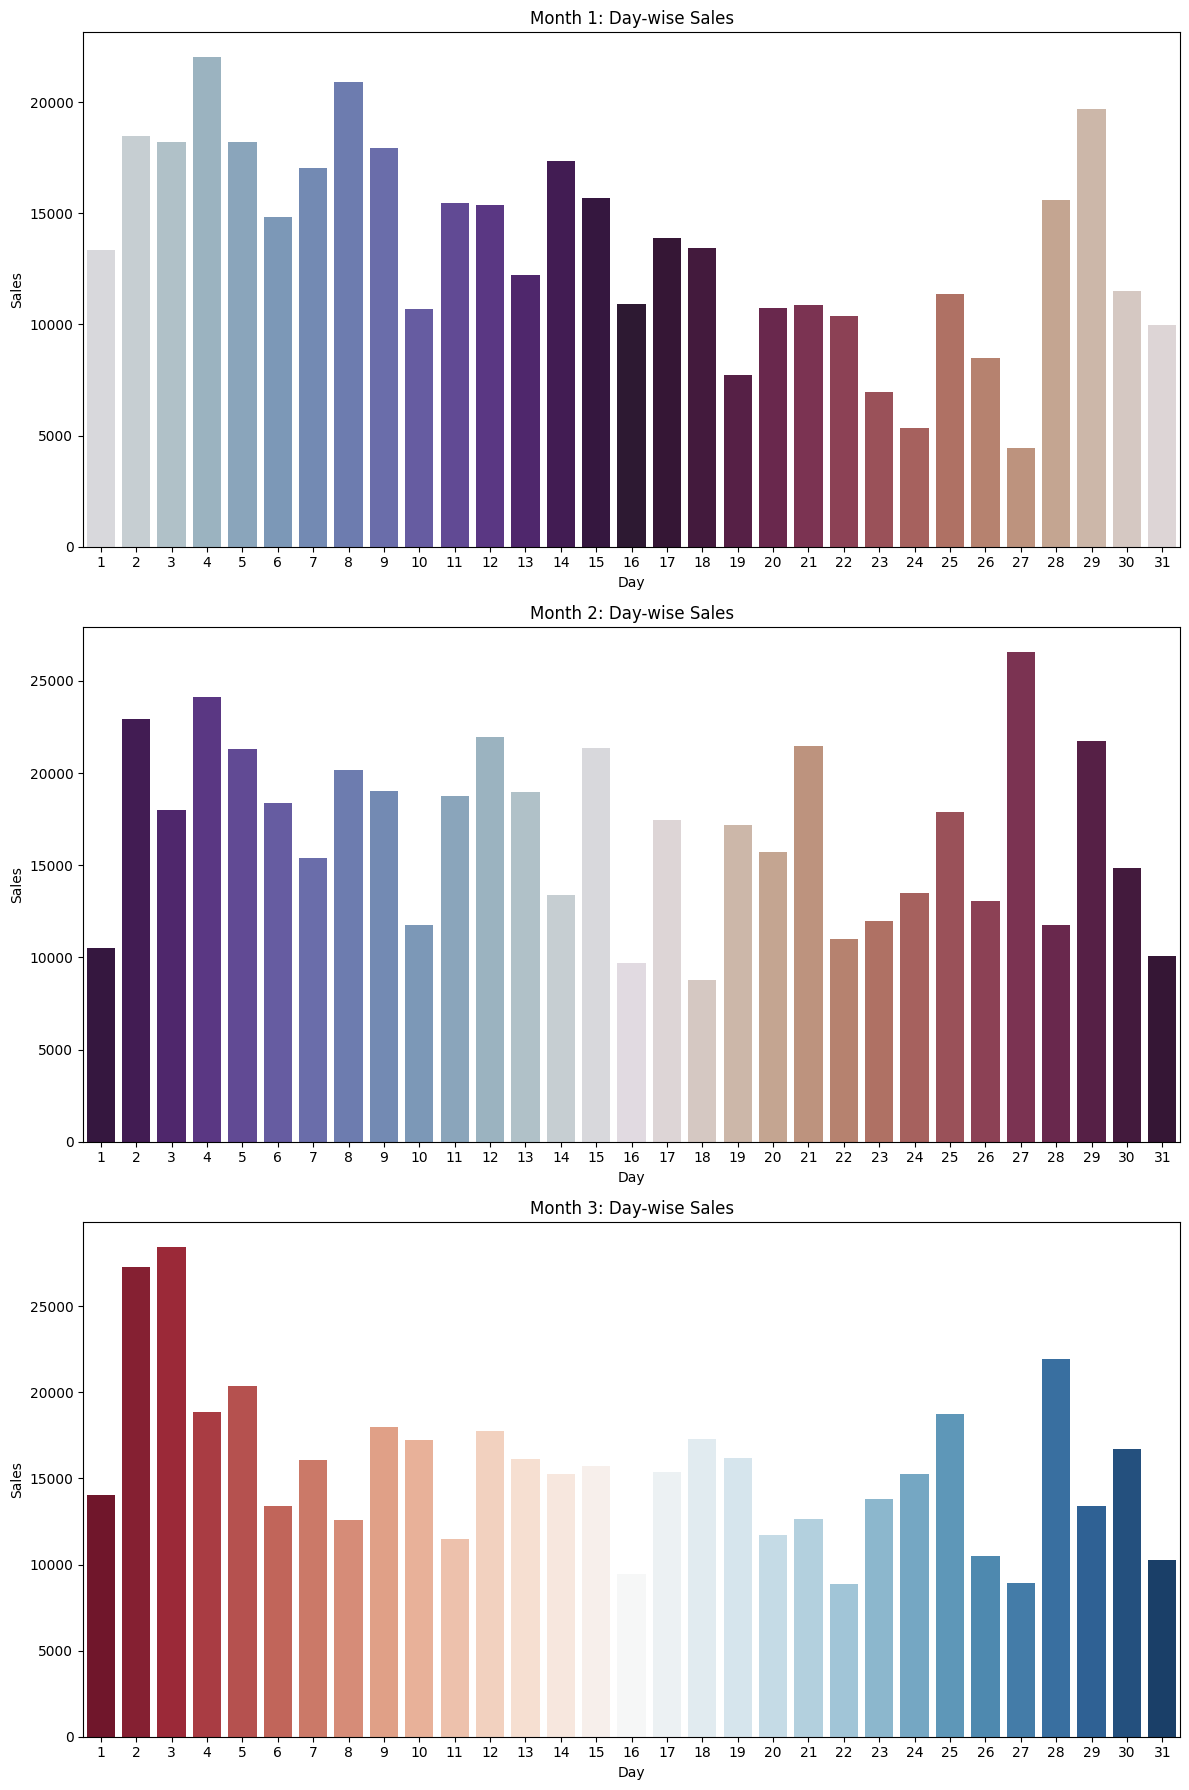

In [72]:
months = df['MONTH'].unique()

plt.figure(figsize=(12, 6 * len(months)))
palettes=['Greens','twilight','twilight_shifted','RdBu']
for i, month in enumerate(months, 1):
    month_data = df[df['MONTH'] == month]
    day_sales_month = month_data.groupby('DAY')['PRICE'].sum().reset_index()
    
    plt.subplot(len(months), 1, i)
    sns.barplot(x='DAY', y='PRICE', data=day_sales_month,palette=palettes[i])
    plt.xlabel('Day')
    plt.ylabel('Sales')
    plt.title(f"Month {month}: Day-wise Sales")

plt.tight_layout()
plt.show()

### The most bought product

In [73]:
most_bought_product = df['GRP'].value_counts().idxmax()
frequency = df['GRP'].value_counts().max()

print(f"The most bought product is '{most_bought_product}' with a frequency of {frequency}.")

The most bought product is 'BISCUITS - CORE & NON CORE' with a frequency of 6646.


In [74]:
unique_grp_count = df['GRP'].nunique()
print("Unique GRP count:", unique_grp_count)

Unique GRP count: 80


### Top 10 Products that Customers most preferred in each store

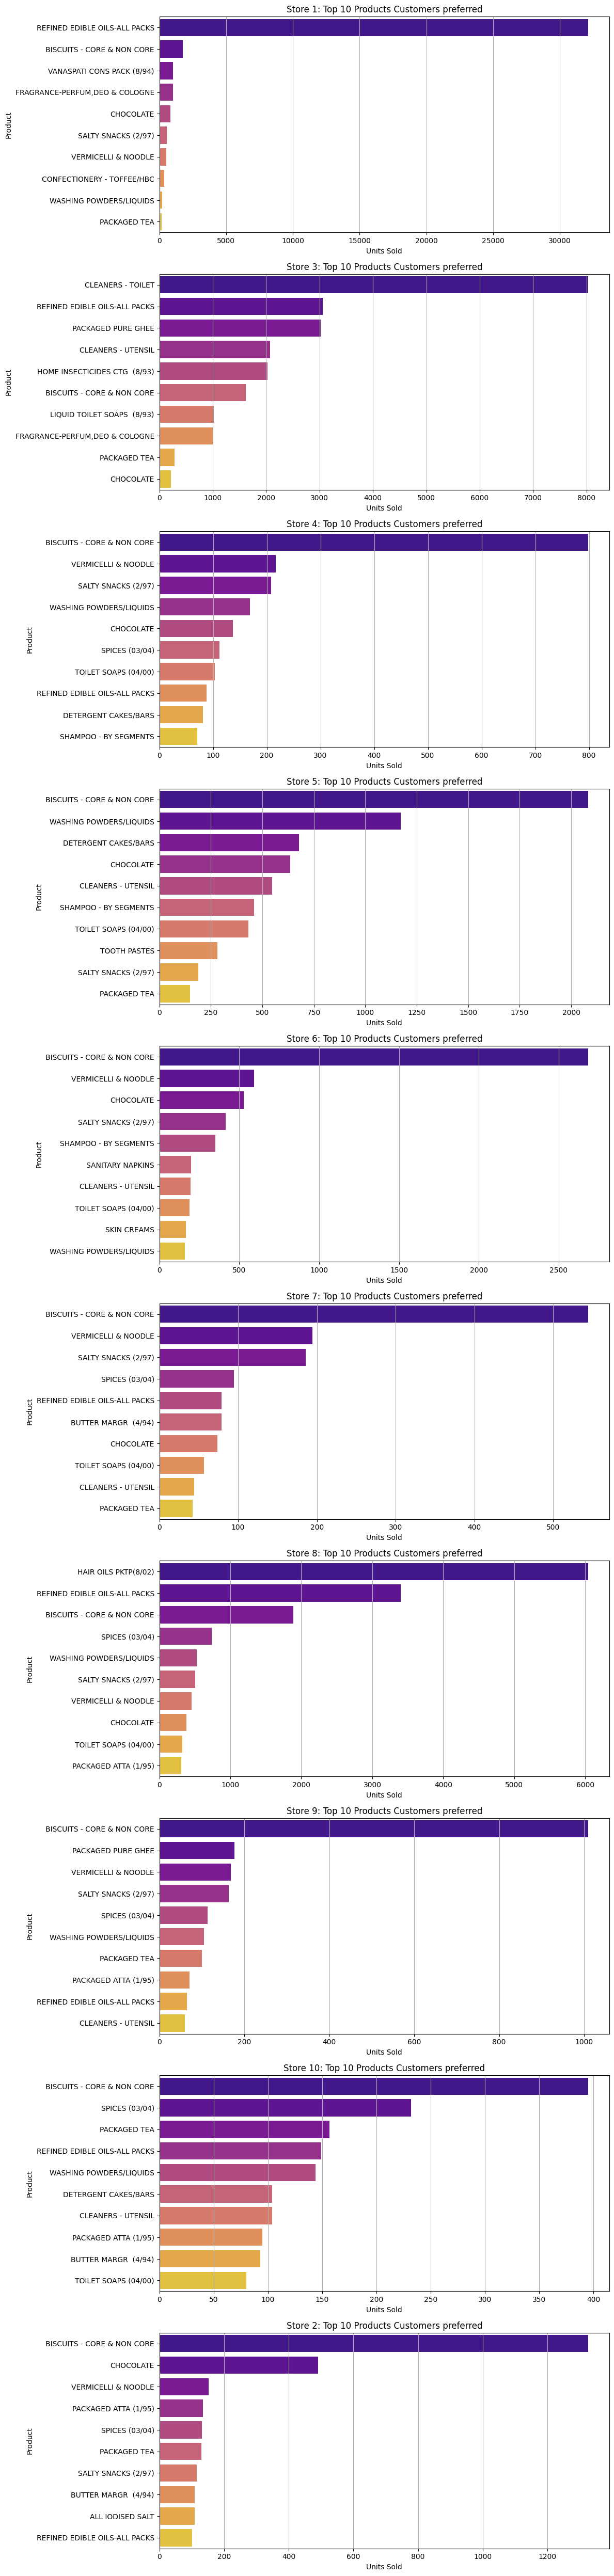

In [75]:
stores = df['STORECODE'].unique()

plt.figure(figsize=(12, 5 * len(stores)))
palettes = ['hls', 'RdPu', 'Blues', 'Greens']

for i, store in enumerate(stores, 1):
    store_data = df[df['STORECODE'] == store]
    most_bought_product_in_each_store = store_data.groupby(['STORECODE', 'GRP'])['QTY'].sum().sort_values(ascending=False).reset_index()
    plt.subplot(len(stores), 1, i)
    sns.barplot(x='QTY', y='GRP', data=most_bought_product_in_each_store[:10], palette='plasma')
    plt.grid(axis='x')
    plt.xlabel('Units Sold')
    plt.ylabel('Product')
    plt.title(f"Store {store}: Top 10 Products Customers preferred")
plt.tight_layout()
plt.show()


### Top 3 products sold in each store

In [76]:
most_bought_product_in_each_store = df.groupby(['STORECODE', 'GRP'])['QTY'].sum().sort_values(ascending=False).reset_index()
most_bought_product_in_each_store.head()

,STORECODE,GRP,QTY
0,1,REFINED EDIBLE OILS-ALL PACKS,32108.0
1,3,CLEANERS - TOILET,8027.0
2,8,HAIR OILS PKTP(8/02),6037.0
3,8,REFINED EDIBLE OILS-ALL PACKS,3403.0
4,3,REFINED EDIBLE OILS-ALL PACKS,3057.0


In [77]:
top_3_products = most_bought_product_in_each_store.groupby("STORECODE").head(3)
top_3_products=top_3_products.sort_values(by='STORECODE', ascending=True)

In [78]:
prd_number=[]
prd_to_assign=['P1','P2','P3']
for i in range(0,int(len(top_3_products.index)/3)):
    prd_number.extend(prd_to_assign)
top_3 =top_3_products.copy()
top_3['PRD'] = prd_number
top_3.head()

,STORECODE,GRP,QTY,PRD
0,1,REFINED EDIBLE OILS-ALL PACKS,32108.0,P1
16,1,VANASPATI CONS PACK (8/94),1019.0,P2
11,1,BISCUITS - CORE & NON CORE,1765.0,P3
33,2,CHOCOLATE,491.0,P1
13,2,BISCUITS - CORE & NON CORE,1325.0,P2


In [79]:
top_3_products_in_each_store=[]
top_3_products_in_each_store = top_3['GRP'].tolist()

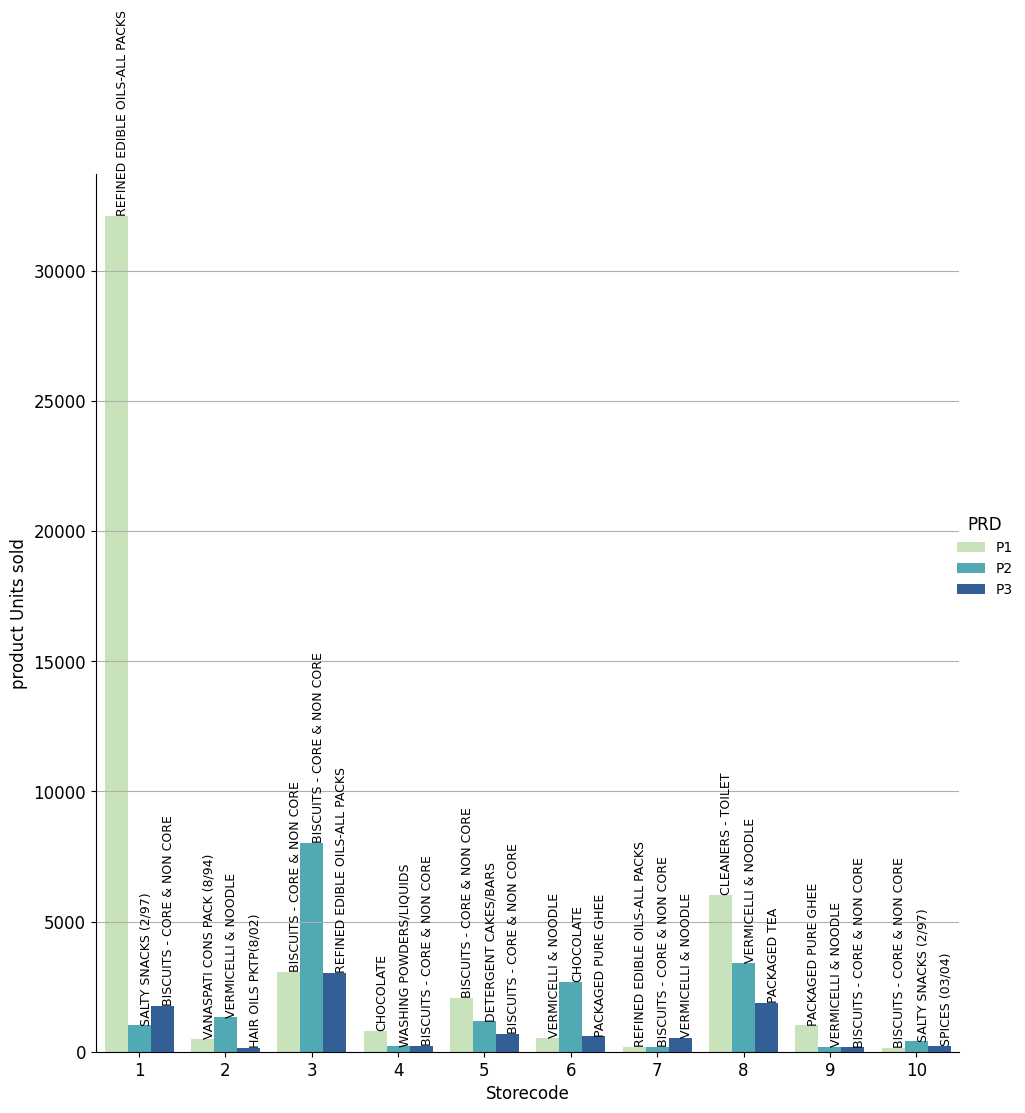

In [80]:
catplot = sns.catplot(x='STORECODE', y='QTY', hue='PRD', data=top_3, kind='bar', height=6, aspect=2,palette='YlGnBu')
ax1 = catplot.ax
annotations = top_3_products_in_each_store
for i, bar in enumerate(ax1.patches): 
    x_coord = bar.get_x() + bar.get_width() / 2 
    y_coord = bar.get_height() + 5 
    annotation_text = annotations[i]
    ax1.text(x_coord,y_coord, annotation_text,rotation=90,fontsize=9, ha='left', va='bottom')
ax1.set_xlabel('Storecode', fontsize=12)
ax1.set_ylabel('product Units sold', fontsize=12)
legend = catplot._legend
legend.set_title('PRD')
legend.get_title().set_fontsize(12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y')
plt.gcf().set_size_inches(10, 10)
plt.show()

In [81]:
top_grp_N1 = top_3_products[top_3_products['STORECODE'] == 1]['GRP'].iloc[0]
print(f"Top GRP for store N1: {top_grp_N1}")

Top GRP for store N1: REFINED EDIBLE OILS-ALL PACKS


# 10. Insight Generation and Reporting

The goal of this task is to derive actionable insights from the EDA. By analyzing customer purchasing patterns, preferences, and behavior, we will provide strategic recommendations. These recommendations may include optimizing inventory management, targeting specific customer segments, and adjusting pricing strategies to enhance overall business performance

Reporting involves compiling the findings from the EDA into a comprehensive document. This report will detail the EDA process, key insights, and strategic recommendations. Additionally, we will prepare a presentation to effectively communicate the results and actionable strategies to stakeholders, ensuring that they understand the implications of the analysis for business decision-making.